### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма:
strategy, maxiter, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

#### Допзадание

Найти множество параметров (strategy=..., maxiter=..., ..., updating=...), которые требуют минимального количества итераций.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# from scipy.optimize import dual_annealing
from scipy.optimize import differential_evolution
from scipy.optimize import basinhopping

%matplotlib inline

In [2]:
import numpy as np
from scipy.optimize import differential_evolution

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [4]:
# поэкспериментируйте с параметрами алгоритма: strategy, maxiter, popsize, tol, mutation, recombination и updating.
strategy_list = ['best1bin', 
                 'best1exp', 
                 'rand1exp', 
                 'randtobest1exp', 
                 'currenttobest1exp', 
                 'best2exp', 
                 'rand2exp', 
                 'randtobest1bin',
                 'currenttobest1bin', 
                 'best2bin', 
                 'rand2bin', 
                 'rand1bin']
nit = []


In [5]:
# str_ka=11
# nit.append(int(str_ka))
# print(nit)

In [6]:
# The differential evolution strategy to use.
for i in strategy_list:
    result = differential_evolution(ackley, bounds, seed=42, strategy = i)
    nit.append(int(result.nit))
    
    print(f'The differential evolution strategy: {i}. \n {result}.')

The differential evolution strategy: best1bin. 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.]).
The differential evolution strategy: best1exp. 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4293
     nit: 140
 success: True
       x: array([0., 0.]).
The differential evolution strategy: rand1exp. 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 7323
     nit: 241
 success: True
       x: array([0., 0.]).
The differential evolution strategy: randtobest1exp. 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4893
     nit: 160
 success: True
       x: array([0., 0.]).
The differential evolution strategy: currenttobest1exp. 
      fun: 4.440892098500626e-16
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 30093
     nit: 1000
 succe

In [7]:
# Отладка листов для построения графиков
print(nit)

[90, 140, 241, 160, 1000, 244, 363, 101, 1000, 166, 232, 168]


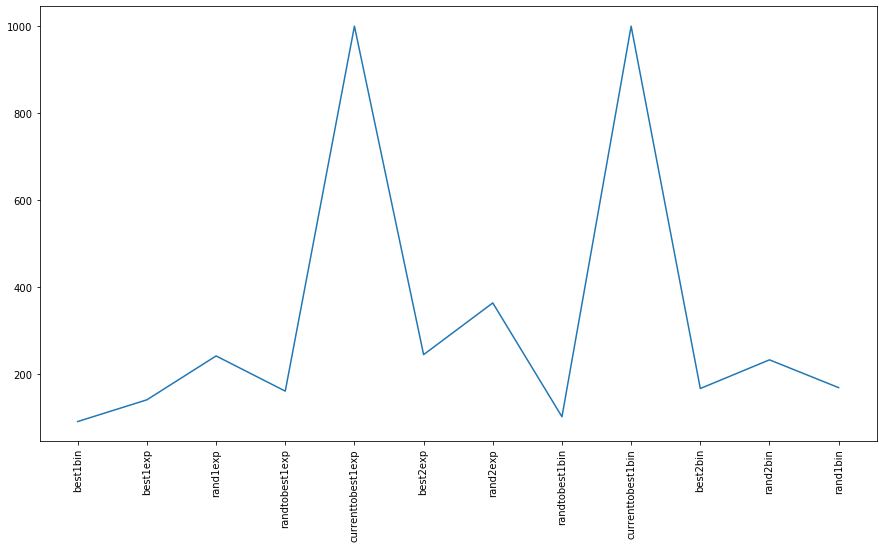

In [8]:
# set plot size for the plot
plt.rcParams["figure.figsize"] = (15, 8)

# create the plot space upon which to plot the data
fig, ax = plt.subplots()

# add the x-axis and the y-axis to the plot
plt.xticks(rotation=90)
ax.plot(strategy_list, nit);

# Вывод: видно что некоторые алгоритмы не сходятся. Останавливаются на 1000 итераций


# maxiter, popsize, tol, mutation, recombination и updating.
maxiterint, optional
The maximum number of generations over which the entire population is evolved. The maximum number of function evaluations (with no polishing) is: (maxiter + 1) * popsize * len(x)

popsizeint, optional
A multiplier for setting the total population size. The population has popsize * len(x) individuals (unless the initial population is supplied via the init keyword).

tolfloat, optional
Relative tolerance for convergence, the solving stops when np.std(pop) <= atol + tol * np.abs(np.mean(population_energies)), where and atol and tol are the absolute and relative tolerance respectively.

mutationfloat or tuple(float, float), optional
The mutation constant. In the literature this is also known as differential weight, being denoted by F. If specified as a float it should be in the range [0, 2]. If specified as a tuple (min, max) dithering is employed. Dithering randomly changes the mutation constant on a generation by generation basis. The mutation constant for that generation is taken from U[min, max). Dithering can help speed convergence significantly. Increasing the mutation constant increases the search radius, but will slow down convergence.

recombinationfloat, optional
The recombination constant, should be in the range [0, 1]. In the literature this is also known as the crossover probability, being denoted by CR. Increasing this value allows a larger number of mutants to progress into the next generation, but at the risk of population stability.

updating{‘immediate’, ‘deferred’}, optional
If 'immediate', the best solution vector is continuously updated within a single generation [4]. This can lead to faster convergence as trial vectors can take advantage of continuous improvements in the best solution. With 'deferred', the best solution vector is updated once per generation. Only 'deferred' is compatible with parallelization, and the workers keyword can over-ride this option.

New in version 1.2.0.


In [9]:
# Задам оптом предельные значения для всех параметров и пройдем циклы и нарисуем, так как требуется в задании
maxiter_list = [10, 20, 30, 50, 70, 90, 100, 150]
popsizeint_list = [1,10,100]
tol_list = [0.01, 0.1, 1, 10, 100, 1000 ]
mutation_list = [0,2]
recombination_list = [0, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 1]
updating_list = ['immediate', 'deferred']

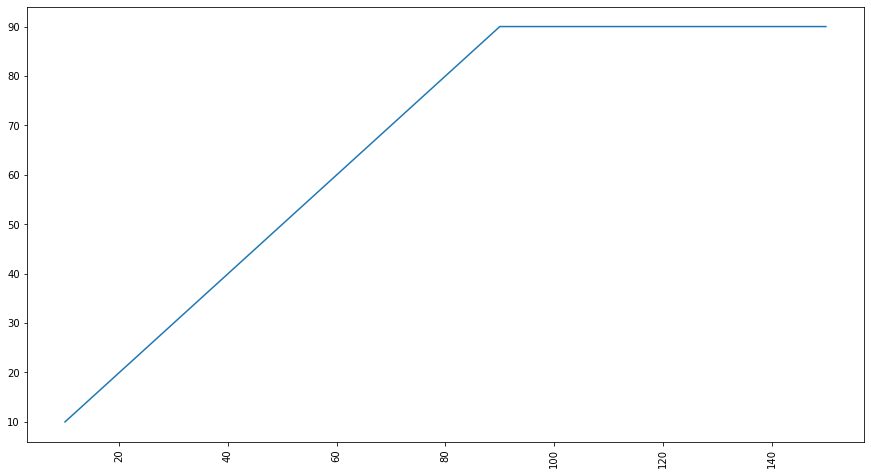

In [10]:
# Постройте графики количества итераций оптимизации функции ackley от значения параметра.
nit = []
for i_mi in maxiter_list:
    result = differential_evolution(ackley, bounds, seed=42, maxiter = int(i_mi))
    nit.append(int(result.nit))

# set plot size for the plot
plt.rcParams["figure.figsize"] = (15, 8)
# create the plot space upon which to plot the data
fig, ax = plt.subplots()
# add the x-axis and the y-axis to the plot
plt.xticks(rotation=90)
ax.plot(maxiter_list, nit);
    

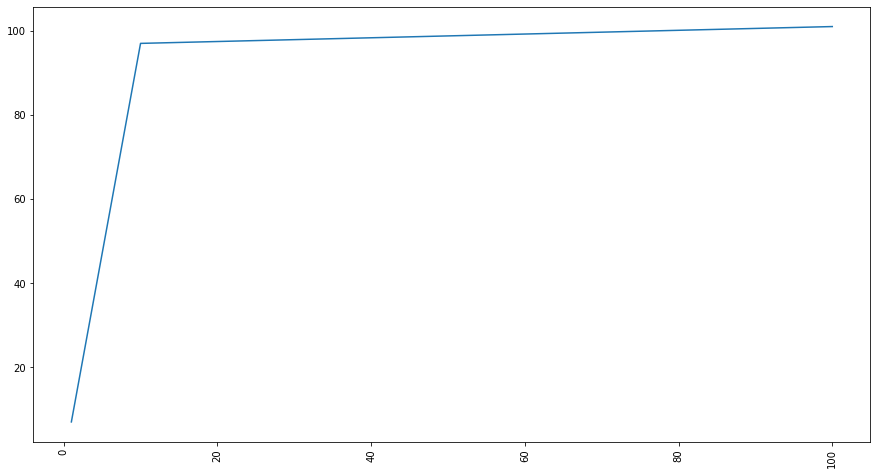

In [11]:
# Постройте графики количества итераций оптимизации функции ackley от значения параметра.
nit = []
for i_ps in popsizeint_list:
    result = differential_evolution(ackley, bounds, seed=42, popsize = int(i_ps))
    nit.append(int(result.nit))

# set plot size for the plot
plt.rcParams["figure.figsize"] = (15, 8)
# create the plot space upon which to plot the data
fig, ax = plt.subplots()
# add the x-axis and the y-axis to the plot
plt.xticks(rotation=90)
ax.plot(popsizeint_list, nit);
# Вывод: задал 5000 - компьютер начал очень большие вычисления. Органичил параметр до 100

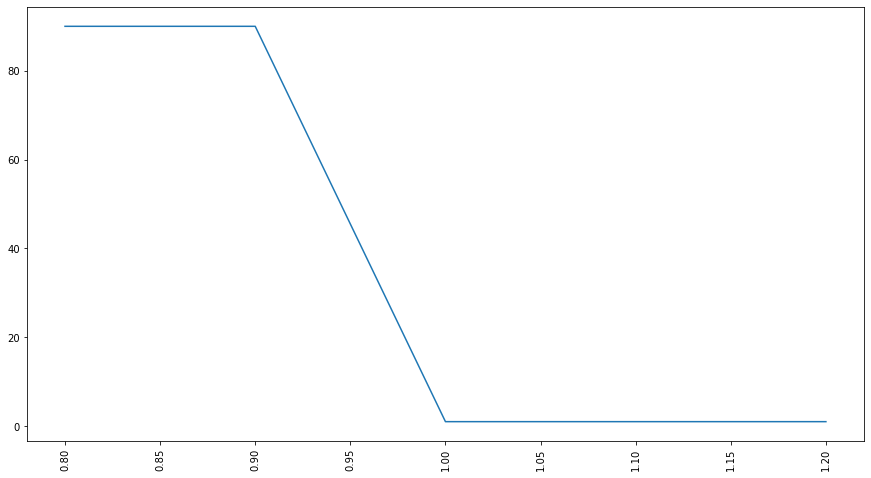

In [12]:
# Постройте графики количества итераций оптимизации функции ackley от значения параметра.
nit = []
tol_list = [0.8, 0.9, 1, 1.2]
for i_tl in tol_list:
    result = differential_evolution(ackley, bounds, seed=42, tol = int(i_tl))
    nit.append(int(result.nit))

# set plot size for the plot
plt.rcParams["figure.figsize"] = (15, 8)
# create the plot space upon which to plot the data
fig, ax = plt.subplots()
# add the x-axis and the y-axis to the plot
plt.xticks(rotation=90)
ax.plot(tol_list, nit);
# Вывод: параметр работает около 1.0

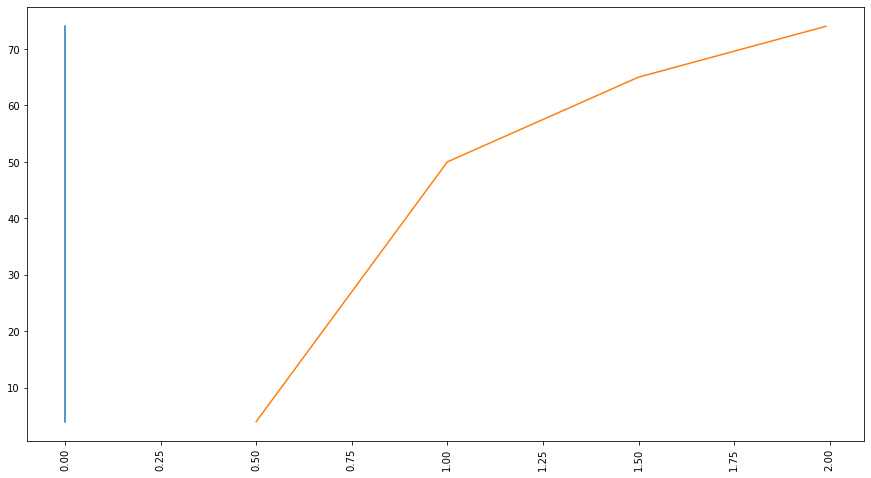

In [13]:
nit = []
# Изменил лист мутации
mutation_list = [(0,0.5), (0,1),(0,1.5),(0,1.99)]
for i_mt in mutation_list:
    result = differential_evolution(ackley, bounds, seed=42, mutation = (float(i_mt[0]), float(i_mt[1])))
    nit.append(int(result.nit))
#     print((i_mt[0], i_mt[1]))

# set plot size for the plot
plt.rcParams["figure.figsize"] = (15, 8)
# create the plot space upon which to plot the data
fig, ax = plt.subplots()
# add the x-axis and the y-axis to the plot
plt.xticks(rotation=90)
ax.plot(mutation_list, nit);
# Вывод: чем более значительные мутации, тем больше итераций

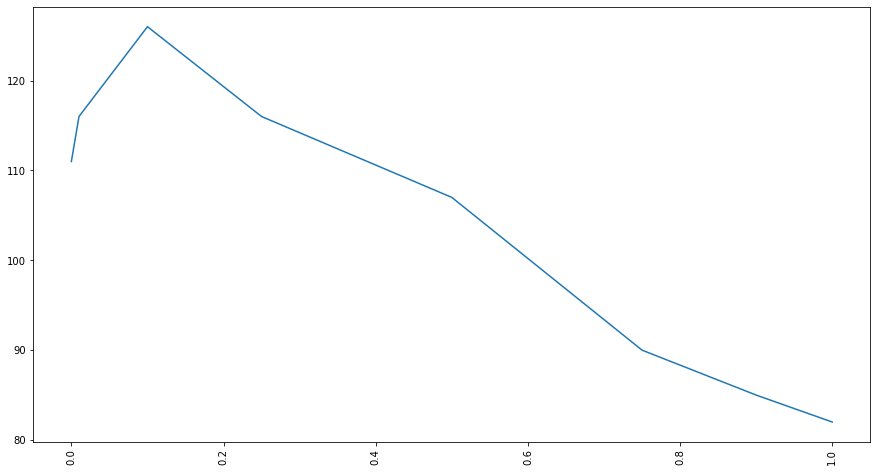

In [14]:
nit = []
# # Изменил лист мутации
# mutation_list = [(0,0.5), (0,1),(0,1.5),(0,1.99)]
for i_rc in recombination_list:
    result = differential_evolution(ackley, bounds, seed=42, recombination = i_rc)
    nit.append(int(result.nit))
#     print((i_mt[0], i_mt[1]))

# set plot size for the plot
plt.rcParams["figure.figsize"] = (15, 8)
# create the plot space upon which to plot the data
fig, ax = plt.subplots()
# add the x-axis and the y-axis to the plot
plt.xticks(rotation=90)
ax.plot(recombination_list, nit);
# Вывод: чем ближе гиперпараметра recombination ближе к единице, тем меньше требуется итераций для обнаружения минимума


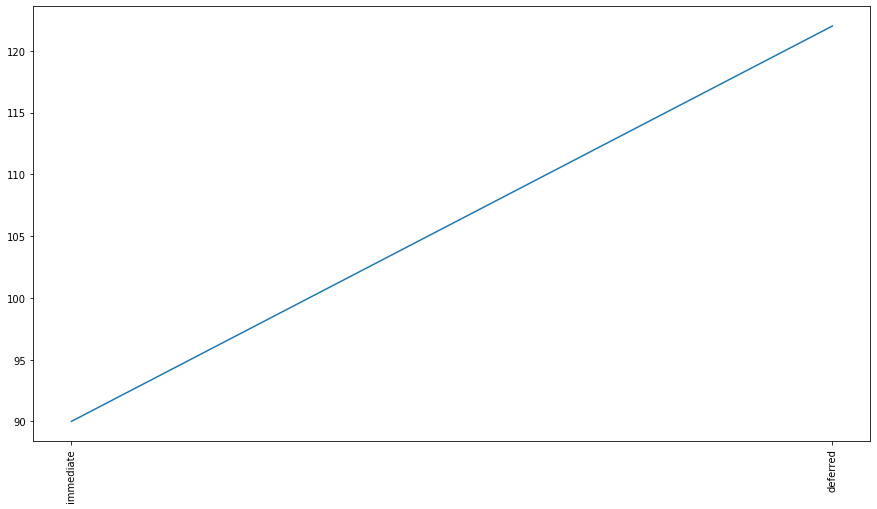

In [16]:
nit = []
# Изменяю способ обновления данных
updating_list = ['immediate', 'deferred']
for i_ud in updating_list:
    result = differential_evolution(ackley, bounds, seed=42, updating = i_ud)
    nit.append(int(result.nit))
#     print((i_mt[0], i_mt[1]))

# set plot size for the plot
plt.rcParams["figure.figsize"] = (15, 8)
# create the plot space upon which to plot the data
fig, ax = plt.subplots()
# add the x-axis and the y-axis to the plot
plt.xticks(rotation=90)
ax.plot(updating_list, nit);
# Вывод: использование гиперпараметра deferred увеличивает количество итераций
# Установлена старая версия scipy. Надо обновить. параметр начинается с версии 1.2
# Обновил

In [ ]:
# Допзадание - не успел
# Найти множество параметров (strategy=..., maxiter=..., ..., updating=...), которые требуют минимального количества итераций.